## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\abhil\AppData\Local\Temp\ipykernel_13656\1616658518.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load and Prepare Dataset

In [2]:
# Load dataset
data = pd.read_csv("C:/Users/abhil/Downloads/customer_data.csv") 
print(data.head())

# Feature selection (e.g., Age, Income, Spending Score)
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Handle missing values (if any)
features = features.dropna()

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


   Customer ID  Age  Gender  Annual Income (k$)  Spending Score (1-100)
0            1   19    Male                  15                      39
1            2   21  Female                  16                      81
2            3   20  Female                  17                       6
3            4   23  Female                  18                      77
4            5   31    Male                  19                      40


## Determine Optimal Clusters Using Elbow Method

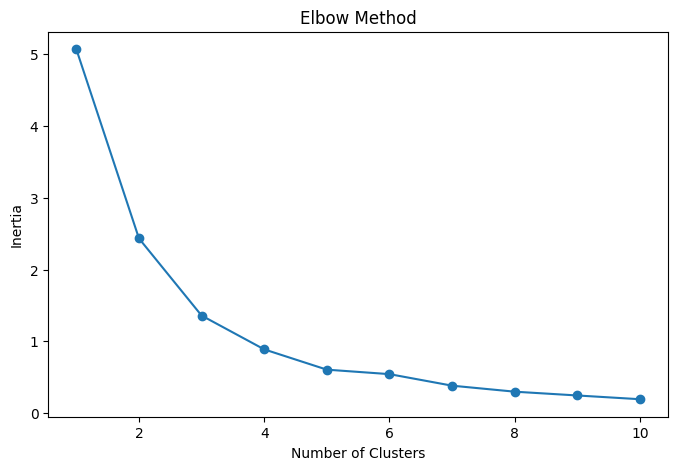

In [3]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


##  Apply K-Means with the optimal number of clusters

In [4]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with the optimal number from Elbow Method
kmeans.fit(features_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_
print(data.head())


   Customer ID  Age  Gender  Annual Income (k$)  Spending Score (1-100)  \
0            1   19    Male                  15                      39   
1            2   21  Female                  16                      81   
2            3   20  Female                  17                       6   
3            4   23  Female                  18                      77   
4            5   31    Male                  19                      40   

   Cluster  
0        2  
1        0  
2        2  
3        0  
4        2  


## Visualize Clusters

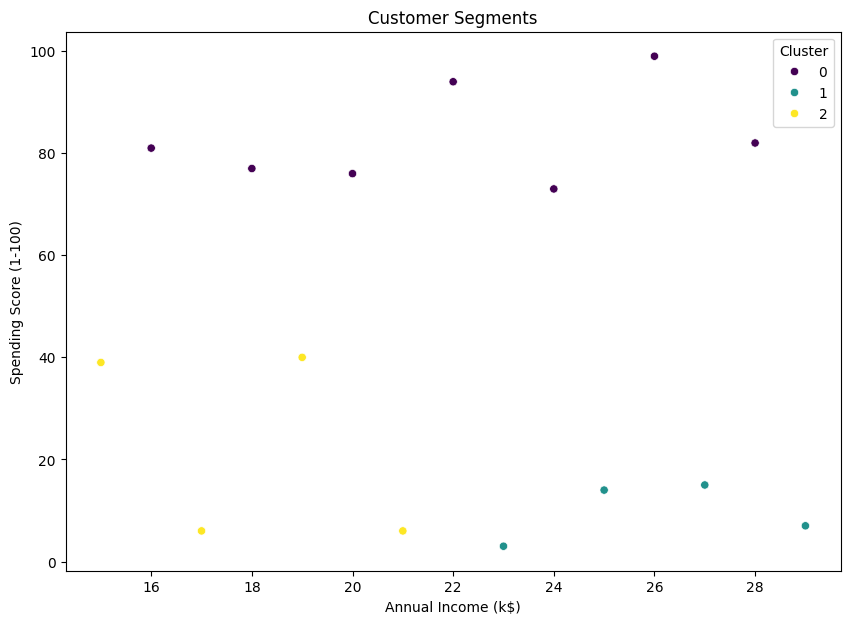

In [5]:
# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis'
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


## Simulate User Input

In [6]:
# Simulate user input
age = 25  # Replace with user-provided age
income = 50  # Replace with user-provided income
spending_score = 50  # Replace with user-provided spending score

# Preprocess user input
input_data = scaler.transform([[age, income, spending_score]])
predicted_cluster = kmeans.predict(input_data)[0]

print(f"The customer belongs to Cluster {predicted_cluster}")


The customer belongs to Cluster 1


C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Learning Outcomes
Understand and implement K-Means clustering.
Preprocess and normalize data for clustering algorithms.
Build interactive user interfaces for machine learning models.